# Preprocessing

In [2]:
# import pandas as pd for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('https://raw.githubusercontent.com/Machine-Learning-Projects1/2020-BRFSS-Codebook-CDC/main/dataset/heart_2020_cleaned.csv')
# df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df_org = df.copy() # make a copy of the original data frame
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [3]:
# copied original dataframe to new dataframe for new encoding methods
df_enc = df_org.copy()

#### 5.1.0 Label Encoding

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define a LabelEncoder
le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df_enc.select_dtypes(include=['object', 'category']).columns.tolist()

# mix of label encoding and one-hot encoding
for col in categorical_cols:
    if len(df_enc[col].unique()) <= 2:
        # label encode binary variables
        df_enc[col] = le.fit_transform(df_enc[col])
    else:
        # one-hot encode non-binary variables
        df_enc = pd.get_dummies(df_enc, columns=[col])

In [5]:
df_enc

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3,30,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


#### 5.1.1 Listing the unique values of each column after encoding
Here we have all possible values on each feature, so please take a look at an example.

- Original: `Diabetic : ['Yes', 'No', 'No-borderline-diabetes', 'Yes-during pregnancy']`
- Encoded:
  - `Diabetic_Yes : [0, 1]`
  - `Diabetic_No : [0, 1]`
  - `Diabetic_No-borderline-diabetes : [0, 1]`
  - `Diabetic_Yes-during pregnancy : [0, 1]`

In [6]:
# iterate over the list to print all unique values of each column in the dataframe
for column in list(df_enc.columns.values):
    print(column, ':', str(df_enc[column].unique()))

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
MentalHealth : [30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
DiffWalking : [0 1]
Sex : [0 1]
PhysicalActivity : [1 0]
SleepTime : [ 5  7  8  6 12  4  9 10 15  3  2  1 16 18 14 20 11 13 17 24 19 21 22 23]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]
AgeCategory_18-24 : [0 1]
AgeCategory_25-29 : [0 1]
AgeCategory_30-34 : [0 1]
AgeCategory_35-39 : [0 1]
AgeCategory_40-44 : [0 1]
AgeCategory_45-49 : [0 1]
AgeCategory_50-54 : [0 1]
AgeCategory_55-59 : [1 0]
AgeCategory_60-64 : [0 1]
AgeCategory_65-69 : [0 1]
AgeCategory_70-74 : [0 1]
AgeCategory_75-79 : [0 1]
AgeCategory_80 or older : [0 1]
Race_American Indian/Alaskan Native : [0 1]
Race_Asian : [0 1]
Race_Black : [0 1]
Race_Hispanic : [0 1]
Race_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split the dataset into train and test set for NEW encoding method
train_data_label, test_data_label = train_test_split(df_enc, train_size=0.80)
train_data_label.shape, test_data_label.shape

((255836, 42), (63959, 42))

In [9]:
# split the train and test set for the NEW encoding method
X_train = train_data_label.drop('HeartDisease', axis=1)
y_train = train_data_label['HeartDisease']
print(X_train.shape, y_train.shape)

X_test = test_data_label.drop('HeartDisease', axis=1)
y_test = test_data_label['HeartDisease']
print(X_test.shape, y_test.shape)

(255836, 41) (255836,)
(63959, 41) (63959,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# there is no data-leakage because we are using
# information of train in test not test in train
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# X_train_new after scaling
X_train

array([[-0.9864453 ,  1.19371806, -0.2699816 , ..., -0.63999672,
        -0.19155274,  1.34384781],
       [ 1.63733184,  1.19371806, -0.2699816 , ..., -0.63999672,
        -0.19155274, -0.74413188],
       [-0.45980339, -0.83771875, -0.2699816 , ...,  1.562508  ,
        -0.19155274, -0.74413188],
       ...,
       [ 1.25689202, -0.83771875, -0.2699816 , ..., -0.63999672,
        -0.19155274,  1.34384781],
       [ 0.69252054,  1.19371806, -0.2699816 , ..., -0.63999672,
        -0.19155274, -0.74413188],
       [ 1.04937939, -0.83771875, -0.2699816 , ...,  1.562508  ,
        -0.19155274, -0.74413188]])

In [12]:
y_train

48956     0
174090    1
319612    0
309080    0
110066    0
         ..
51055     0
251407    0
27612     0
311077    0
81639     0
Name: HeartDisease, Length: 255836, dtype: int32

In [13]:
df_enc['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [14]:
# import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [15]:
# Counter is a collection where elements are stored as
# dictionary keys and their counts are stored as dictionary values.
from collections import Counter

In [16]:
# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

print('Original: {}'.format(Counter(y_train)))
print('   SMOTE: {}'.format(Counter(y_train_smote)))

Original: Counter({0: 233964, 1: 21872})
   SMOTE: Counter({0: 233964, 1: 233964})


In [17]:
# kfold cross validation
from sklearn.model_selection import KFold

# make a 10 fold cross validation
cv = KFold(n_splits=10, random_state=None, shuffle=False)

# SVM

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# SVM
model_svm = SVC()
model_svm.fit(X_train_smote, y_train_smote)

SVC()

In [19]:
y_pred_svm = model_svm.predict(X_test)

In [20]:
#check
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred_svm )
print(confusion_matrix(y_test,y_pred_svm ))
print(accuracy_score(y_test,y_pred_svm ))
print(classification_report(y_test,y_pred_svm ))

[[46845 11613]
 [ 1994  3507]]
0.7872543348082365
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     58458
           1       0.23      0.64      0.34      5501

    accuracy                           0.79     63959
   macro avg       0.60      0.72      0.61     63959
weighted avg       0.90      0.79      0.83     63959



Text(-4.277777777777779, 0.5, 'Truth')

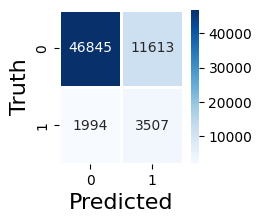

In [21]:
#check
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

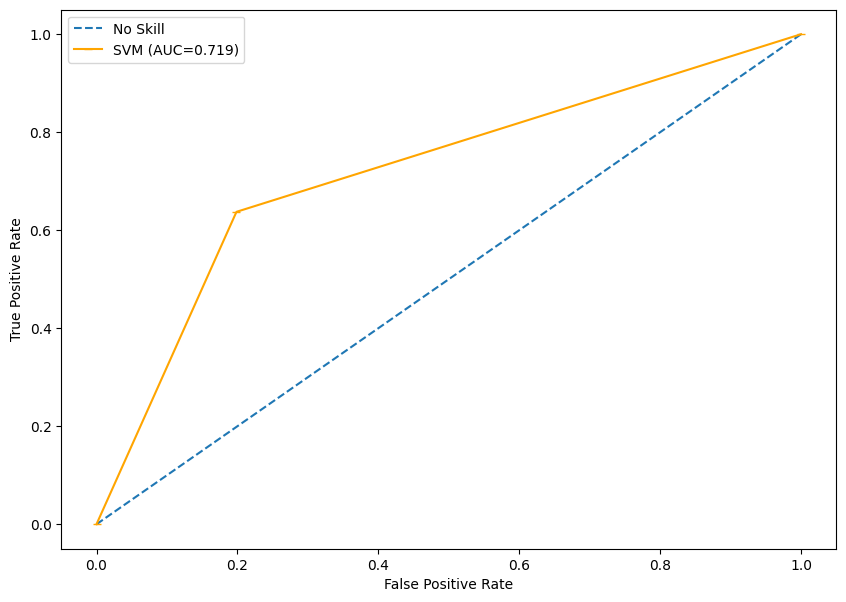

In [23]:
from sklearn.metrics import auc, roc_curve
#check
#ROC-AUC
#predict Probabilities
y_score_svm=model_svm.predict(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
#yes_probs=y_score_svm[:,1]
#Size of the plot
plt.figure(figsize=(10,7), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_svm , tpr_svm, threshold_svm=roc_curve(y_test,y_score_svm)  # false positive, true posistive, threshold
#AUC
auc_svm=auc(fpr_svm , tpr_svm)
#Plot the ROC Curve
plt.plot(fpr_svm, tpr_svm, marker='_', label='SVM (AUC=%0.3f)' % auc_svm, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

# Neural Network

In [24]:
#import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [25]:
#make the layers
nn_model=Sequential([
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=512, activation='relu'),
        Dropout(0.2),
        Dense(units=256, activation='relu'),
        Dropout(0.2),
        Dense(units=128, activation='relu'),
        Dropout(0.2),
        Dense(units=1 , activation='sigmoid')
])

In [26]:
#set properties of the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
#fit the model on the train dataset
#nn_model.fit(X_train_blnc,y_train_blnc, epochs=100)  #main one
nn_model.fit(X_train_smote,y_train_smote, epochs=30)   #just for make it easier we decreased the epoch number

Epoch 1/30
14623/14623 [==============================] - 110s 7ms/step - loss: 0.4758 - accuracy: 0.7792
Epoch 2/30
14623/14623 [==============================] - 110s 7ms/step - loss: 0.4402 - accuracy: 0.7950
Epoch 3/30
14623/14623 [==============================] - 108s 7ms/step - loss: 0.4173 - accuracy: 0.8056
Epoch 4/30
14623/14623 [==============================] - 102s 7ms/step - loss: 0.4040 - accuracy: 0.8110
Epoch 5/30
14623/14623 [==============================] - 109s 7ms/step - loss: 0.3959 - accuracy: 0.8154
Epoch 6/30
14623/14623 [==============================] - 105s 7ms/step - loss: 0.3896 - accuracy: 0.8190
Epoch 7/30
14623/14623 [==============================] - 101s 7ms/step - loss: 0.3843 - accuracy: 0.8216
Epoch 8/30
14623/14623 [==============================] - 94s 6ms/step - loss: 0.3800 - accuracy: 0.8243
Epoch 9/30
14623/14623 [==============================] - 86s 6ms/step - loss: 0.3754 - accuracy: 0.8271
Epoch 10/30
14623/14623 [=======================

In [28]:
#predict the y value on train data and compare with actual y train and get accuracy on train
nn_model.evaluate(X_train_smote,y_train_smote)

14623/14623 [==============================] - 43s 3ms/step - loss: 0.3024 - accuracy: 0.8732


[0.3023540675640106, 0.8732390403747559]

In [29]:
#predict the predicted y values and compare with actual ys , and get get accuracy on test
nn_model.evaluate(X_test,y_test)

1999/1999 [==============================] - 6s 3ms/step - loss: 0.4234 - accuracy: 0.8042


[0.4234226644039154, 0.804233968257904]

In [30]:
#predict the  predicted ys
y_pred=nn_model.predict(X_test)
y_pred

1999/1999 [==============================] - 5s 3ms/step


array([[5.0639187e-04],
       [1.1680203e-01],
       [3.2449892e-01],
       ...,
       [6.8806469e-01],
       [3.8509906e-04],
       [4.8844352e-02]], dtype=float32)

In [31]:
#for testing different threshold   Threshold=T
y_pred=[int(f> 0.5) for f in y_pred]

In [32]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[48310 10148]
 [ 2373  3128]]
0.8042339623821511
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     58458
           1       0.24      0.57      0.33      5501

    accuracy                           0.80     63959
   macro avg       0.59      0.70      0.61     63959
weighted avg       0.89      0.80      0.84     63959



Text(-4.277777777777779, 0.5, 'Truth')

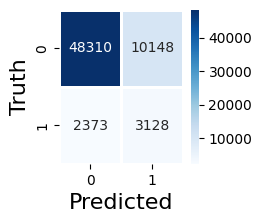

In [33]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

1999/1999 [==============================] - 6s 3ms/step


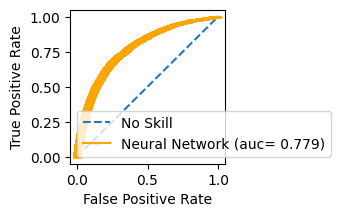

In [34]:
#ROC-AUC
#predict Probabilities
y_score_nn=nn_model.predict(X_test)   #results are probailities for each sample for each class

#Size of the plot
plt.figure(figsize=(2,2), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_nn , tpr_nn, threshold_nn=roc_curve(y_test,y_score_nn)  # false positive, true posistive, threshold
#AUC
auc_nn=auc(fpr_nn , tpr_nn)
#Plot the ROC Curve
plt.plot(fpr_nn, tpr_nn, marker='_', label='Neural Network (auc= %0.3f)' % auc_nn, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

# XGBoost
#### It is for the phase 2 , not completed yet

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xg_model=XGBClassifier()
param_grid={'gamma':[0.12]}
xg_cv=GridSearchCV(xg_model,param_grid,cv=10)
xg_cv.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [0.12]})

In [36]:
y_pred=xg_cv.predict(X_test)

In [37]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55736  2722]
 [ 4221  1280]]
0.8914460826466956
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58458
           1       0.32      0.23      0.27      5501

    accuracy                           0.89     63959
   macro avg       0.62      0.59      0.61     63959
weighted avg       0.88      0.89      0.88     63959



Text(-4.277777777777779, 0.5, 'Truth')

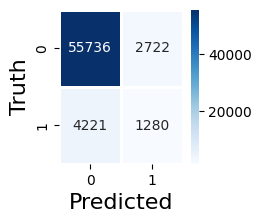

In [38]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

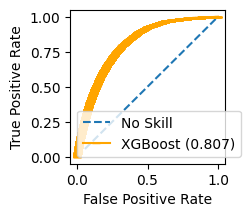

In [39]:
#ROC-AUC
#predict Probabilities
y_score_xg=xg_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_xg[:,1]
#Size of the plot
plt.figure(figsize=(2,2), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_xg , tpr_xg, threshold_xg=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_xg=auc(fpr_xg , tpr_xg)
#Plot the ROC Curve
plt.plot(fpr_xg, tpr_xg, marker='_', label='XGBoost (%0.3f)' % auc_xg, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Logestic Regression

In [40]:
from sklearn.linear_model import LogisticRegression # import logistic regression
from sklearn.model_selection import GridSearchCV  #import gridsearch

In [41]:
#make the model
logreg=LogisticRegression()

In [62]:
#hyperparameters
param_dict={"penalty":["l2"],"C":np.logspace(-3,3,7), "max_iter":[1000]}
#param_dict={"penalty":["l1","l2"],"C":[0.1,1,10,20,100,1000]}  # we did not use this
#param_dict={"penalty":["l1","l2"],"C":[10]}# we did not use this

In [63]:
#Grid Serch
logreg_cv=GridSearchCV(logreg,param_dict,cv=10)

In [64]:
#fit the model
logreg_cv.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000], 'penalty': ['l2']})

In [65]:
#the best hyperparametrs
logreg_cv.best_params_

{'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}

In [66]:
#prediction
y_pred=logreg_cv.predict(X_test)

C:\Users\Mziae\AppData\Local\Temp\ipykernel_20380\2976146425.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e0, hist=False, color='blue' )
C:\Users\Mziae\AppData\Local\Temp\ipykernel_20380\2976146425.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e1, hist=False, colo

<AxesSubplot: ylabel='Density'>

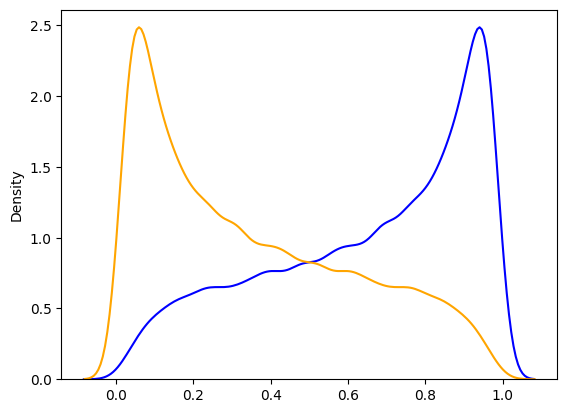

In [67]:
#plot for comparing probability belongs to class0, class1)
import seaborn as sns
prob=logreg_cv.predict_proba(X_test)
e0=[]  #empty list for class0
e1=[]  #empty list for class1
for i in prob:
  e0.append(i[0])
  e1.append(i[1])
sns.distplot(e0, hist=False, color='blue' )
sns.distplot(e1, hist=False, color='Orange')

In [68]:
#check the lenght
print(len(y_pred))
print(len(y_test))

63959
63959


In [69]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[43653 14805]
 [ 1274  4227]]
0.748604574805735
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58458
           1       0.22      0.77      0.34      5501

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.75      0.80     63959



Text(-4.277777777777779, 0.5, 'Truth')

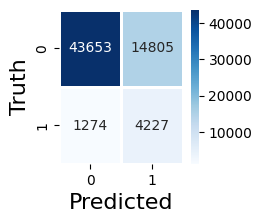

In [70]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

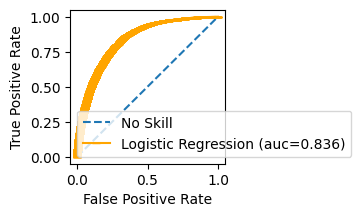

In [71]:
#ROC-AUC
#predict Probabilities
y_score_log=logreg_cv.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_log[:,1]
#Size of the plot
plt.figure(figsize=(2,2), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_log , tpr_log, threshold_log=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_log=auc(fpr_log , tpr_log)
#Plot the ROC Curve
plt.plot(fpr_log , tpr_log, marker='_', label='Logistic Regression (auc=%0.3f)' %auc_log, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

## Gradient Boost

In [52]:
#make the model and hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid={'learning_rate':[0.1,0.01], 'n_estimators':[100],'max_depth':[3]}  #n_estimators is the number of trees ,
                                                                                    #max_depth= the depth of each tree
gb_model=GradientBoostingClassifier()

In [53]:
#fit model on the train dataset
gb_cv1=RandomizedSearchCV(gb_model,param_grid,cv=10)

In [54]:
#fit the model on train dataset
gb_cv1.fit(X_train_smote, y_train_smote)

C:\Users\Mziae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.01],
                                        'max_depth': [3],
                                        'n_estimators': [100]})

In [55]:
#the best hyperparametrs
gb_cv1.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [56]:
#test the model on the test dataset
y_pred=gb_cv1.predict(X_test)

In [57]:
#Evaluation
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[52328  6130]
 [ 2849  2652]]
0.8596131896996514
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     58458
           1       0.30      0.48      0.37      5501

    accuracy                           0.86     63959
   macro avg       0.63      0.69      0.65     63959
weighted avg       0.89      0.86      0.87     63959



Text(-4.277777777777779, 0.5, 'Truth')

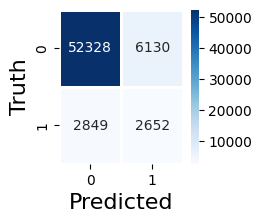

In [58]:
#Confusion MAtrix on heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(2,2))
sn.heatmap(cm,annot=True,linewidths=0.8,fmt='d',cmap='Blues')
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Truth',fontsize=16)

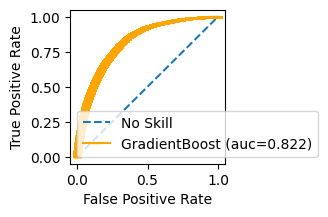

In [59]:
#ROC-AUC
#predict Probabilities
y_score_gb=gb_cv1.predict_proba(X_test)   #results are probailities for each sample for each class
#retrieve the probabilities only for the class1 (yes, positve class)
yes_probs=y_score_gb[:,1]
#Size of the plot
plt.figure(figsize=(2,2), dpi=100)
#plot "No-Skill" on ROC Curve
plt.plot([0,1],[0,1],linestyle='--',label='No Skill')
# calculate the features of ROC curve
fpr_gb , tpr_gb, threshold_gb=roc_curve(y_test,yes_probs)  # false positive, true posistive, threshold
#AUC
auc_gb=auc(fpr_gb , tpr_gb)
#Plot the ROC Curve
plt.plot(fpr_gb, tpr_gb, marker='_', label='GradientBoost (auc=%0.3f)' % auc_gb, color='Orange')
#X-axis label
plt.xlabel("False Positive Rate")
#Y-axis label
plt.ylabel("True Positive Rate")
#show the legend
plt.legend()
#show the plot
plt.show()

# Comparision

In [95]:
#figure size
plt.figure(figsize=(10,7),dpi=1200)
#Plot the ROC Curve
plt.plot(fpr_log, tpr_log, marker='_', label='Logistic Regression (AUC = %0.3f)' % auc_log, color='Red')
plt.plot(fpr_gb, tpr_gb, marker='_', label='Gradient Boost (AUC = %0.3f)' % auc_gb, color='Blue')
plt.plot(fpr_xg, tpr_xg, marker='_', label='XGBoost (AUC = %0.3f)' % auc_xg, color='Green')
plt.plot(fpr_nn, tpr_nn, marker='_', label='Neural Network (AUC = %0.3f)' % auc_nn, color='Purple')
plt.plot(fpr_svm, tpr_svm, marker='_', label='SVM (AUC = %0.3f)' % auc_svm, color='Black')




#X-axis label
plt.xlabel("False Positive Rate", fontname="Times New Roman", size=12, fontweight="bold")
#Y-axis label
plt.ylabel("True Positive Rate", fontname="Times New Roman", size=12, fontweight="bold")
#show the legend
plt.legend(prop={'size':8,"family":"Times New Roman" })
#show the plot
plt.show()

#save the figure
#beingsaved.savefig('myimage.eps', format='eps', dpi=1200)

In [75]:
import pickle
pickle.dump(model_svm, open('c:\\Users\\Mziae\\Desktop\\SVM.pkl', 'wb'))
pickle.dump(nn_model, open('c:\\Users\\Mziae\\Desktop\\NN.pkl', 'wb'))
pickle.dump(xg_cv, open('c:\\Users\\Mziae\\Desktop\\XG.pkl', 'wb'))
pickle.dump(logreg_cv, open('c:\\Users\\Mziae\\Desktop\\LG.pkl', 'wb'))
pickle.dump(gb_cv1, open('c:\\Users\\Mziae\\Desktop\\GB.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://1e457a9d-d31d-45a3-83ac-f7b529dfe22e/assets
